# EDA - Backtesting and validating all strategies (not real-time)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import sys
import os

In [27]:
#read QQQ csv
df = pd.read_csv('QQQ.csv', parse_dates=['Date'], index_col='Date')

In [28]:
df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,150.990005,155.750000,150.880005,154.880005,150.242905,58576700
2019-01-03,152.600006,153.259995,149.490005,149.820007,145.334381,74820200
2019-01-04,152.339996,157.000000,151.740005,156.229996,151.552490,74709300
2019-01-07,156.619995,158.860001,156.110001,158.089996,153.356827,52059300
2019-01-08,159.539993,160.110001,157.199997,159.520004,154.743988,49388700


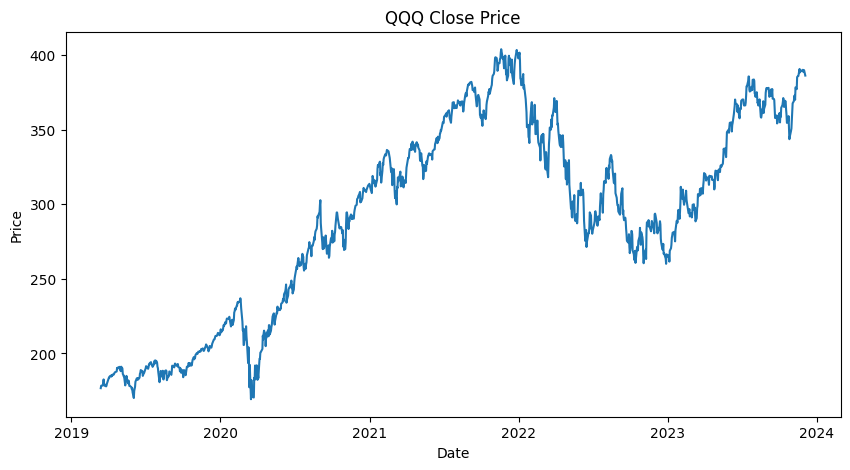

In [101]:
#visualize the Close price
plt.figure(figsize=(10, 5))
plt.plot(df['Close'])
plt.title('QQQ Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [30]:
#MA20
df['MA20'] = df['Close'].rolling(20).mean()
#MA50
df['MA50'] = df['Close'].rolling(50).mean()

In [31]:
df = df.dropna()

In [32]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-03-14,177.130005,177.339996,176.660004,176.710007,171.419342,23751500,173.492999,167.6130
2019-03-15,177.399994,178.880005,177.279999,178.350006,173.010239,38192000,173.849500,168.0824
2019-03-18,177.949997,178.990005,177.589996,178.449997,173.422272,32935100,174.174999,168.6550
2019-03-19,179.179993,180.000000,178.289993,179.050003,174.005371,36893300,174.513499,169.1114
2019-03-20,179.059998,180.860001,178.240005,179.759995,174.695389,50105000,174.888999,169.5448


In [33]:
#df = df[['Close', 'MA20', 'MA50']]

In [34]:
Buy = []
Sell = []
for i in range(1, len(df)):
    if df['MA20'][i] > df['MA50'][i] and df['MA20'][i-1] < df['MA50'][i-1]:
        Buy.append(i)
    elif df['MA20'][i] < df['MA50'][i] and df['MA20'][i-1] > df['MA50'][i-1]:
        Sell.append(i)

C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\1242049831.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['MA20'][i] > df['MA50'][i] and df['MA20'][i-1] < df['MA50'][i-1]:
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\1242049831.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['MA20'][i] < df['MA50'][i] and df['MA20'][i-1] > df['MA50'][i-1]:


In [35]:
Buy

[75, 132, 282, 403, 524, 569, 666, 772, 850, 931, 978, 1180]

In [46]:
#crossover strategy is when MA20 crosses MA50 from below, it is a buy signal - MA20 is greater than MA50
#when MA20 crosses MA50 from above, it is a sell signal - MA20 is less than MA50 
#how much is bought depends on the amount of money you have
#Buy and Sell are the index of the dataframe
#filter dataframe for Buy and Sell
df_buy = df.iloc[Buy]
df_sell = df.iloc[Sell]
df_buy.head()




,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI
Date,,,,,,,,,,,,,,,,,
2019-07-01,190.320007,190.570007,188.380005,189.259995,184.334351,31025600,184.039000,183.880600,186.119535,184.365107,1.754427,1.304652,184.128273,5.860001,192.268019,175.809981,66.858440
2019-09-20,193.110001,193.309998,190.160004,190.800003,185.834305,29086100,189.480999,189.434199,191.296823,189.999280,1.297544,1.110586,188.319142,3.330002,196.391733,182.570265,60.036165
2020-04-27,216.190002,216.630005,214.500000,215.559998,211.278686,36451700,202.490998,202.044200,208.735157,203.789740,4.945417,3.350742,203.630005,19.080002,224.696027,180.285969,70.829695
2020-10-16,291.799988,293.269989,288.149994,288.510010,283.271545,40570700,279.536504,279.512202,285.766898,281.677595,4.089303,2.638637,282.168587,11.309998,297.947401,261.125606,60.931763
2021-04-13,338.239990,341.079987,338.019989,340.600006,335.445007,30374000,322.978499,322.706999,329.980763,324.682383,5.298379,2.823374,322.898952,23.380005,342.288182,303.668816,79.327708


In [47]:
df_sell.head()


,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI
Date,,,,,,,,,,,,,,,,,
2019-05-28,178.660004,179.660004,177.470001,177.490005,172.489365,24763800,183.814500,183.953400,181.083985,182.958285,-1.874300,-1.008707,185.245778,-8.750000,192.401907,175.227092,32.956748
2019-08-19,188.160004,188.830002,187.500000,188.429993,183.525955,22494100,188.473998,188.546599,186.436737,187.644788,-1.208051,-0.965428,180.013578,-5.350006,197.901567,179.046430,43.354025
2020-03-10,201.110001,204.300003,193.679993,204.110001,199.630692,100599200,219.887000,220.518600,211.075500,216.512796,-5.437296,-2.993896,213.166491,-32.869995,246.332064,193.441935,32.738159
2020-10-01,281.790008,282.880005,279.839996,282.250000,277.125214,50020200,274.098503,274.837202,275.058383,275.281830,-0.223447,-0.965755,262.338987,11.799988,286.479454,261.717552,60.665208
2021-03-11,315.769989,319.859985,314.850006,318.040008,312.831421,53484800,320.178500,320.368799,314.115763,317.759861,-3.644098,-2.704554,297.450012,-12.979981,342.548721,297.808279,42.535088


In [36]:
Sell

[51, 109, 249, 392, 502, 555, 646, 712, 788, 883, 957, 1119]

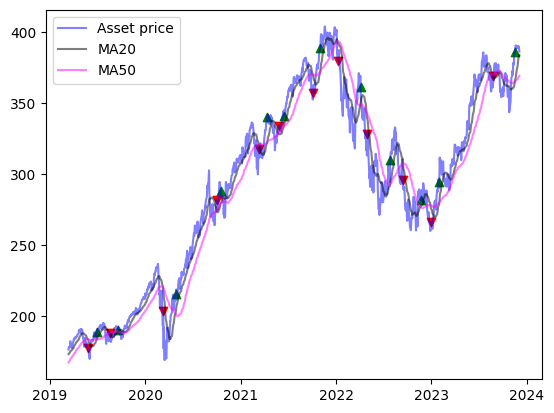

In [37]:
plt.plot(df['Close'], label='Asset price', c='blue',alpha=0.5)
plt.plot(df['MA20'], label='MA20', c='k',alpha=0.5)
plt.plot(df['MA50'], label='MA50', c='magenta',alpha=0.5)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Close'], marker='^', c='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Close'], marker='v', c='red')
plt.legend()
plt.show()


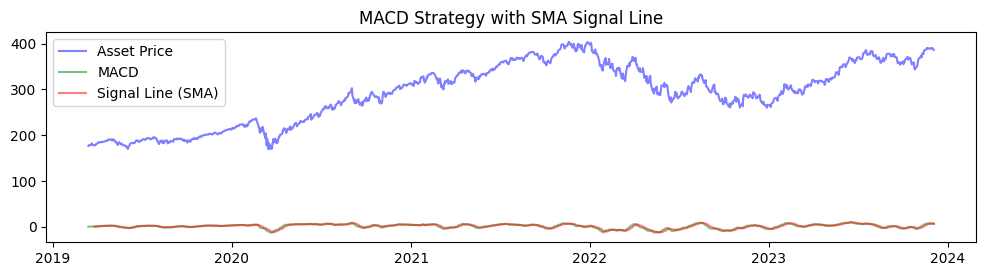

In [87]:
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']

# Modified Signal Line Calculation (using SMA instead of EMA)
signal_window = 9
df['Signal_Line'] = df['MACD'].rolling(window=signal_window).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Asset Price', color='blue', alpha=0.5)
plt.plot(df['MACD'], label='MACD', color='green', alpha=0.5)
plt.plot(df['Signal_Line'], label='Signal Line (SMA)', color='red', alpha=0.5)
plt.title('MACD Strategy with SMA Signal Line')
plt.legend()
plt.show()


In [88]:
# give me dataframe for buy signal for MACD
Buy_MACD = []
Sell_MACD = []
for i in range(1, len(df)):
    if df['MACD'][i] > df['Signal_Line'][i] and df['MACD'][i-1] < df['Signal_Line'][i-1]:
        Buy_MACD.append(i)
    elif df['MACD'][i] < df['Signal_Line'][i] and df['MACD'][i-1] > df['Signal_Line'][i-1]:
        Sell_MACD.append(i)
        

C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\2860725149.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['MACD'][i] > df['Signal_Line'][i] and df['MACD'][i-1] < df['Signal_Line'][i-1]:
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\2860725149.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['MACD'][i] < df['Signal_Line'][i] and df['MACD'][i-1] > df['Signal_Line'][i-1]:


In [89]:
#dataframe for this buy signal
Buy_MACD_df = df.iloc[Buy_MACD]
Buy_MACD_df.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI,Momentum_Pct_Change,Price_Change_Pct,Price_Change
Date,,,,,,,,,,,,,,,,,,,,
2019-04-01,181.509995,182.259995,180.770004,182.039993,176.911163,30969500,177.338499,172.472199,179.164813,178.342471,0.822342,0.684823,176.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-07,178.559998,181.770004,178.330002,181.039993,175.939301,45888300,178.925999,183.415000,177.686872,179.806090,-2.119219,-2.510289,169.270004,3.139999,186.492539,171.359460,46.561212,0.017650,0.017650,3.139999
2019-08-20,187.960007,188.639999,186.919998,186.970001,182.103973,19902900,188.132999,188.622999,186.518777,187.594804,-1.076026,-1.189748,180.206907,3.820007,197.238834,179.027164,44.709187,0.020857,0.020857,3.820007
2019-08-29,187.389999,188.460007,186.679993,187.919998,183.029266,25358900,185.512500,188.861399,186.028481,186.851895,-0.823414,-0.985978,181.456165,0.809998,190.401263,180.623737,52.090022,0.004329,0.004329,0.809998
2019-10-11,190.830002,192.630005,190.720001,191.110001,186.511566,40976700,189.054501,187.923800,188.369623,188.634519,-0.264896,-0.499435,181.972207,0.960007,194.000428,184.108573,51.086571,0.005049,0.005049,0.960007


In [90]:
#dataframe for this sell signal
Sell_MACD_df = df.iloc[Sell_MACD]
Sell_MACD_df.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI,Momentum_Pct_Change,Price_Change_Pct,Price_Change
Date,,,,,,,,,,,,,,,,,,,,
2019-03-28,178.360001,178.979996,177.240005,178.309998,173.286209,30368200,176.693999,171.757799,178.456971,177.917603,0.539369,0.595091,182.356507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,190.779999,191.320007,188.800003,188.929993,183.606979,34797100,187.177499,180.652399,188.617500,186.098494,2.519007,2.575337,188.210007,NaN,192.121745,182.233254,67.798308,NaN,NaN,NaN
2019-07-18,191.289993,192.789993,190.690002,192.419998,187.412140,28877000,190.105000,184.467400,191.551829,189.075782,2.476047,2.511959,194.190002,6.179993,195.529987,184.680012,71.828930,0.033183,0.033183,6.179993
2019-08-28,183.830002,185.399994,182.910004,185.089996,180.272903,21792400,185.624000,188.845199,185.684569,186.766447,-1.081878,-1.062004,181.288332,-1.320007,190.835054,180.412946,45.218702,-0.007081,-0.007081,-1.320007
2019-09-23,190.360001,191.070007,189.720001,190.500000,185.916275,22485900,189.902499,189.373599,191.174235,190.036370,1.137865,1.278564,188.830411,-3.029999,195.874609,183.930389,66.091585,-0.015656,-0.015656,-3.029999


In [91]:
# Mean Reversion Strategy
window_size = 20
std_dev_factor = 2

# Calculate Moving Average and Standard Deviation
df['Moving_Avg'] = df['Close'].rolling(window=window_size).mean()
df['Std_Dev'] = df['Close'].rolling(window=window_size).std()

# Define Upper and Lower Bands
df['Upper_Band'] = df['Moving_Avg'] + (df['Std_Dev'] * std_dev_factor)
df['Lower_Band'] = df['Moving_Avg'] - (df['Std_Dev'] * std_dev_factor)

# Identify Buy and Sell Signals
df['Buy_Signal'] = np.where(df['Close'] < df['Lower_Band'], 1, 0)
df['Sell_Signal'] = np.where(df['Close'] > df['Upper_Band'], 1, 0)


C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\765845990.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Buy_Signal'][i]:
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\765845990.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df.index[i], df['Close'][i], color='green', marker='^', alpha=1)
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\765845990.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

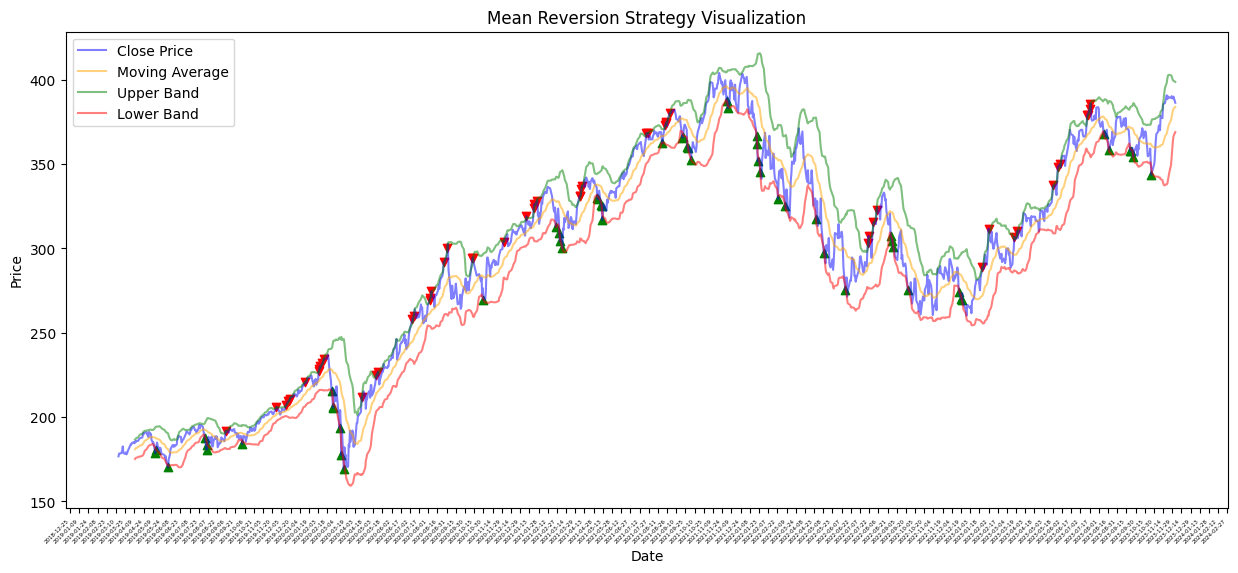

In [100]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df is your DataFrame with 'Close', 'Moving_Avg', 'Upper_Band', 'Lower_Band', 'Buy_Signal', 'Sell_Signal'

# Create a figure and a set of subplots
plt.figure(figsize=(15, 7))

# Plot the closing prices
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)

# Plot the moving average, upper band, and lower band
plt.plot(df['Moving_Avg'], label='Moving Average', color='orange', alpha=0.5)
plt.plot(df['Upper_Band'], label='Upper Band', color='green', alpha=0.5)
plt.plot(df['Lower_Band'], label='Lower Band', color='red', alpha=0.5)

# Plot buy signals
for i in range(len(df)):
    if df['Buy_Signal'][i]:
        plt.scatter(df.index[i], df['Close'][i], color='green', marker='^', alpha=1)

# Plot sell signals
for i in range(len(df)):
    if df['Sell_Signal'][i]:
        plt.scatter(df.index[i], df['Close'][i], color='red', marker='v', alpha=1)

# Beautify the x-labels
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15)) # Adjust the interval for your dataset

#reduce font size on x axis
plt.xticks(fontsize=4)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Mean Reversion Strategy Visualization')
plt.legend()

# Show the plot
plt.show()


In [92]:
# give me dataframe for buy signal for Mean Reversion
Buy_MR = []
Sell_MR = []
for i in range(1, len(df)):
    if df['Buy_Signal'][i] > df['Buy_Signal'][i-1]:
        Buy_MR.append(i)
    elif df['Sell_Signal'][i] > df['Sell_Signal'][i-1]:
        Sell_MR.append(i)


C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\1536695755.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Buy_Signal'][i] > df['Buy_Signal'][i-1]:
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\1536695755.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Sell_Signal'][i] > df['Sell_Signal'][i-1]:


In [93]:
#dataframe for this buy signal
Buy_MR_df = df.iloc[Buy_MR]
Buy_MR_df.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,...,Upper_Band,Lower_Band,RSI,Momentum_Pct_Change,Price_Change_Pct,Price_Change,Moving_Avg,Std_Dev,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-13,180.289993,181.259995,178.059998,178.580002,173.548645,67185800,187.749000,182.739800,185.930397,185.884785,...,193.734035,181.763965,21.816421,NaN,NaN,NaN,187.749000,2.992517,1,0
2019-06-03,173.479996,173.949997,169.270004,170.119995,165.326950,75842300,180.773500,183.494200,177.522295,180.589052,...,190.285536,171.261464,33.977266,-0.068193,-0.068193,-12.450012,180.773500,4.756018,1,0
2019-08-02,188.720001,188.990005,186.210007,187.350006,182.474091,55214000,192.443498,186.658399,191.751127,190.884683,...,196.414112,188.472884,32.564107,0.034969,0.034969,6.330002,192.443498,1.985307,1,0
2019-10-02,186.000000,186.029999,183.020004,184.050003,179.621475,48544300,190.446500,188.680399,188.527825,189.018540,...,195.232811,185.660188,26.388911,-0.050261,-0.050261,-9.739990,190.446500,2.393156,1,0
2020-02-25,223.250000,223.990005,214.740005,215.369995,210.643570,97743000,228.138500,220.772000,227.909358,226.198642,...,240.779599,215.497402,32.047475,0.050688,0.050688,10.389999,228.138500,6.320549,1,0


In [94]:
#dataframe for this sell signal
Sell_MR_df = df.iloc[Sell_MR]
Sell_MR_df.head()


,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,...,Upper_Band,Lower_Band,RSI,Momentum_Pct_Change,Price_Change_Pct,Price_Change,Moving_Avg,Std_Dev,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-05,190.410004,192.330002,190.339996,191.779999,186.788818,33932600,186.394500,188.915799,187.305601,187.278336,...,191.338835,181.450165,65.086617,0.037041,0.037041,6.850006,186.394500,2.472168,0,1
2019-11-27,205.139999,206.050003,204.889999,206.039993,201.082336,16963100,201.654999,195.161400,202.843371,200.244328,...,205.767928,197.542070,78.593327,0.070226,0.070226,13.519989,201.654999,2.056464,0,1
2019-12-13,206.399994,207.910004,205.960007,207.190002,202.204697,32519400,203.816000,198.593799,204.556105,202.682849,...,207.092058,200.539941,65.933422,0.113506,0.113506,21.119995,203.816000,1.638029,0,1
2019-12-19,209.639999,210.929993,209.619995,210.860001,205.786392,17865900,205.194500,200.381200,207.147837,204.572851,...,210.850144,199.538856,68.774414,0.126208,0.126208,23.630005,205.194500,2.827822,0,1
2020-01-13,219.330002,220.979996,218.979996,220.949997,216.101105,22756900,213.543500,206.863999,216.018738,212.292063,...,220.760681,206.326318,76.339754,0.121630,0.121630,23.959991,213.543500,3.608591,0,1


In [95]:
#number of MR buy signals
len(Buy_MR)

36

In [96]:
#number of MR sell signals
len(Sell_MR)

35

In [83]:
# For Momentum Strategy
lookback_period = 50  # Match the lookback period from the class-based strategy

# Calculate the price change by subtracting the closing price 'lookback_period' days ago from the current closing price
df['Price_Change'] = df['Close'] - df['Close'].shift(lookback_period)



In [74]:
# For Bollinger Bands
sma = df['Close'].rolling(window=20).mean()
std = df['Close'].rolling(window=20).std()
df['Upper_Band'] = sma + (std * 2)
df['Lower_Band'] = sma - (std * 2)

# For RSI
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

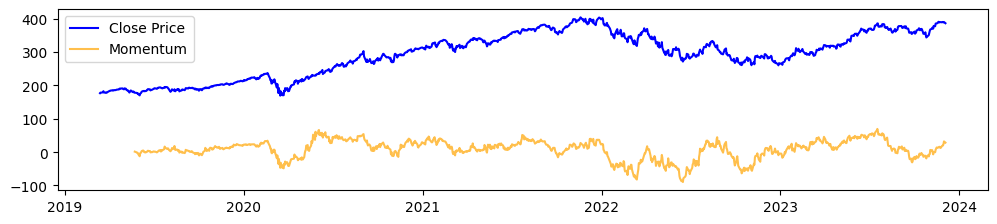

In [75]:
plt.figure(figsize=(12, 8))

# Subplot for Close Price and Momentum
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['Momentum'], label='Momentum', color='orange', alpha=0.7)
plt.legend()


In [84]:
# give me dataframe for buy signal for momemtum
Buy_Momentum = []
Sell_Momentum = []
for i in range(lookback_period, len(df)):
    if df['Price_Change'][i] > 0 and df['Price_Change'][i-1] <= 0:
        Buy_Momentum.append(i)
    elif df['Price_Change'][i] < 0 and df['Price_Change'][i-1] >= 0:
        Sell_Momentum.append(i)





C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\119959366.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Price_Change'][i] > 0 and df['Price_Change'][i-1] <= 0:
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\119959366.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Price_Change'][i] < 0 and df['Price_Change'][i-1] >= 0:


In [85]:
#dataframe for this buy signal
Buy_Momentum_df = df.iloc[Buy_Momentum]
Buy_Momentum_df.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI,Momentum_Pct_Change,Price_Change_Pct,Price_Change
Date,,,,,,,,,,,,,,,,,,,,
2019-06-07,178.559998,181.770004,178.330002,181.039993,175.939301,45888300,178.925999,183.4150,177.686872,179.806090,-2.119219,-2.323762,169.270004,3.139999,186.492539,171.359460,46.561212,0.017650,0.017650,3.139999
2019-06-17,183.039993,184.250000,182.839996,183.740005,178.563248,20379500,179.101500,183.5842,181.143233,181.034622,0.108611,-0.913079,173.480464,0.029999,186.614046,171.588954,61.950276,0.000163,0.000163,0.029999
2019-07-01,190.320007,190.570007,188.380005,189.259995,184.334351,31025600,184.039000,183.8806,186.119535,184.365107,1.754427,1.304652,184.128273,1.869995,192.268019,175.809981,66.858440,0.009979,0.009979,1.869995
2019-07-09,188.809998,190.899994,188.649994,190.660004,185.697937,19193500,187.036501,183.9566,188.631269,186.345888,2.285381,1.920755,188.100529,0.010010,192.872614,181.200387,63.665579,0.000053,0.000053,0.010010
2019-08-26,184.139999,184.869995,183.080002,184.820007,180.009918,27598900,186.392001,188.8578,186.040434,187.098209,-1.057775,-0.949843,180.942320,2.180008,193.072472,179.711529,52.102445,0.011936,0.011936,2.180008


In [86]:
#dataframe for this sell signal
Sell_Momentum_df = df.iloc[Sell_Momentum]
Sell_Momentum_df.head()


,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI,Momentum_Pct_Change,Price_Change_Pct,Price_Change
Date,,,,,,,,,,,,,,,,,,,,
2019-05-28,178.660004,179.660004,177.470001,177.490005,172.489365,24763800,183.814500,183.9534,181.083985,182.958285,-1.874300,-1.008707,185.245778,-0.860001,192.401907,175.227092,32.956748,-0.004822,-0.004822,-0.860001
2019-06-14,182.479996,183.110001,181.940002,182.639999,177.494247,22844100,179.066499,183.5836,180.671093,180.818191,-0.147098,-1.168501,172.719643,-1.139999,186.494096,171.638903,58.709162,-0.006203,-0.006203,-1.139999
2019-06-25,188.029999,188.139999,184.649994,184.929993,180.117050,33921100,181.468000,183.8528,184.997630,183.351763,1.645867,0.822837,180.362342,-0.900009,192.309306,170.626694,71.541461,-0.004843,-0.004843,-0.900009
2019-06-28,186.949997,187.149994,186.070007,186.740005,181.879974,21179200,183.082000,183.8432,185.548542,183.973516,1.575026,1.192208,183.358946,-0.409988,193.027298,173.136702,61.879564,-0.002191,-0.002191,-0.409988
2019-07-08,189.809998,189.869995,188.929993,189.710007,184.772675,17598800,186.661000,183.9564,188.262408,186.000759,2.261650,1.829598,187.464439,-0.769989,192.481856,180.840145,67.284292,-0.004042,-0.004042,-0.769989


In [60]:
#number of momemtum buy signals
Buy_Momentum_df.shape

(49, 17)

In [61]:
#number of momemtum sell signals
Sell_Momentum_df.shape

(49, 17)

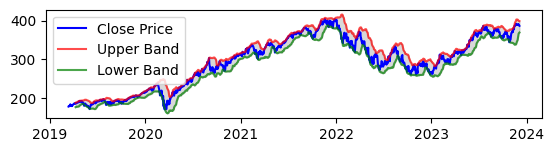

In [42]:
# Subplot for Close Price and Bollinger Bands
plt.subplot(3, 1, 2)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['Upper_Band'], label='Upper Band', color='red', alpha=0.7)
plt.plot(df['Lower_Band'], label='Lower Band', color='green', alpha=0.7)
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='grey', alpha=0.3)
plt.legend()


In [62]:
# give me dataframe for buy signal for bollinger bands
Buy_BB = []
Sell_BB = []
for i in range(1, len(df)):
    if df['Close'][i] < df['Lower_Band'][i] and df['Close'][i-1] > df['Lower_Band'][i-1]:
        Buy_BB.append(i)
    elif df['Close'][i] > df['Upper_Band'][i] and df['Close'][i-1] < df['Upper_Band'][i-1]:
        Sell_BB.append(i)


C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\3855251682.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Close'][i] < df['Lower_Band'][i] and df['Close'][i-1] > df['Lower_Band'][i-1]:
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\3855251682.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Close'][i] > df['Upper_Band'][i] and df['Close'][i-1] < df['Upper_Band'][i-1]:


In [64]:
#dataframe for this buy signal
Buy_BB_df = df.iloc[Buy_BB]
Buy_BB_df.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI
Date,,,,,,,,,,,,,,,,,
2019-05-13,180.289993,181.259995,178.059998,178.580002,173.548645,67185800,187.749000,182.739800,185.930397,185.884785,0.045612,1.367928,189.398223,-11.729996,193.734035,181.763965,21.816421
2019-06-03,173.479996,173.949997,169.270004,170.119995,165.326950,75842300,180.773500,183.494200,177.522295,180.589052,-3.066757,-1.944436,183.674349,-8.460007,190.285536,171.261464,33.977266
2019-08-02,188.720001,188.990005,186.210007,187.350006,182.474091,55214000,192.443498,186.658399,191.751127,190.884683,0.866444,1.753374,195.177587,-6.799988,196.414112,188.472884,32.564107
2019-10-02,186.000000,186.029999,183.020004,184.050003,179.621475,48544300,190.446500,188.680399,188.527825,189.018540,-0.490715,0.296410,192.522798,-9.179993,195.232811,185.660188,26.388911
2020-02-25,223.250000,223.990005,214.740005,215.369995,210.643570,97743000,228.138500,220.772000,227.909358,226.198642,1.710716,3.645126,236.625121,-12.100006,240.779599,215.497402,32.047475


In [65]:
#dataframe for this sell signal
Sell_BB_df = df.iloc[Sell_BB]
Sell_BB_df.head()



,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI
Date,,,,,,,,,,,,,,,,,
2019-09-05,190.410004,192.330002,190.339996,191.779999,186.788818,33932600,186.394500,188.915799,187.305601,187.278336,0.027265,-0.607523,182.094596,9.229996,191.338835,181.450165,65.086617
2019-11-27,205.139999,206.050003,204.889999,206.039993,201.082336,16963100,201.654999,195.161400,202.843371,200.244328,2.599044,2.569457,200.859883,5.610001,205.767928,197.542070,78.593327
2019-12-13,206.399994,207.910004,205.960007,207.190002,202.204697,32519400,203.816000,198.593799,204.556105,202.682849,1.873256,1.871329,199.912654,5.360001,207.092058,200.539941,65.933422
2019-12-19,209.639999,210.929993,209.619995,210.860001,205.786392,17865900,205.194500,200.381200,207.147837,204.572851,2.574986,2.174185,202.959890,5.759995,210.850144,199.538856,68.774414
2020-01-13,219.330002,220.979996,218.979996,220.949997,216.101105,22756900,213.543500,206.863999,216.018738,212.292063,3.726675,3.340962,213.515037,9.239990,220.760681,206.326318,76.339754


In [66]:
#number of BB buy signals
Buy_BB_df.shape


(36, 17)

In [67]:
#number of BB sell signals
Sell_BB_df.shape


(35, 17)

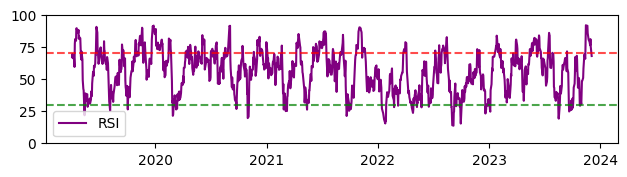

In [43]:
# Subplot for RSI
plt.subplot(3, 1, 3)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.7) # Overbought line
plt.axhline(30, color='green', linestyle='--', alpha=0.7) # Oversold line
plt.ylim([0, 100])
plt.legend()

plt.tight_layout()
plt.show()


In [68]:
# give me dataframe for buy signal for RSI
Buy_RSI = []
Sell_RSI = []
for i in range(1, len(df)):
    if df['RSI'][i] > 30 and df['RSI'][i-1] < 30:
        Buy_RSI.append(i)
    elif df['RSI'][i] < 70 and df['RSI'][i-1] > 70:
        Sell_RSI.append(i)


C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\1225694121.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['RSI'][i] > 30 and df['RSI'][i-1] < 30:
C:\Users\sanch\AppData\Local\Temp\ipykernel_17652\1225694121.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['RSI'][i] < 70 and df['RSI'][i-1] > 70:


In [69]:
#dataframe for this buy signal
Buy_RSI_df = df.iloc[Buy_RSI]
Buy_RSI_df.head()


,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI
Date,,,,,,,,,,,,,,,,,
2019-05-15,179.350006,183.550003,179.309998,183.089996,177.931549,40944500,187.312499,183.033000,184.791703,185.311180,-0.519477,0.709535,187.243960,-7.389999,194.344534,180.280465,34.572024
2019-05-28,178.660004,179.660004,177.470001,177.490005,172.489365,24763800,183.814500,183.953400,181.083985,182.958285,-1.874300,-1.008707,185.245778,-8.750000,192.401907,175.227092,32.956748
2019-08-06,182.399994,183.800003,181.070007,183.259995,178.490555,41897200,191.624497,186.809999,189.010095,189.623411,-0.613315,0.987190,193.404369,-8.940002,199.196777,184.052218,33.258411
2019-10-03,184.029999,186.210007,181.820007,186.070007,181.592865,39392500,190.161000,188.498800,188.149699,188.800130,-0.650431,0.107042,191.762575,-6.469986,195.281896,185.040104,34.424688
2020-03-02,208.880005,216.570007,205.940002,216.419998,211.670517,112933900,226.109000,221.011600,219.745386,222.198126,-2.452740,0.571915,228.429330,-15.550003,245.343818,206.874182,34.434430


In [70]:
#dataframe for this sell signal
Sell_RSI_df = df.iloc[Sell_RSI]
Sell_RSI_df.head()

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,EMA12,EMA26,MACD,Signal_Line,SAR,Momentum,Upper_Band,Lower_Band,RSI
Date,,,,,,,,,,,,,,,,,
2019-05-01,190.779999,191.320007,188.800003,188.929993,183.606979,34797100,187.177499,180.652399,188.617500,186.098494,2.519007,2.531494,188.210007,3.459992,192.121745,182.233254,67.798308
2019-05-06,187.050003,190.199997,186.759995,189.940002,184.588577,38371800,188.027999,181.700399,189.089528,186.854519,2.235010,2.408849,191.250000,4.080002,192.516832,183.539166,65.178592
2019-06-27,186.460007,186.940002,185.990005,186.500000,181.646240,19709200,182.442500,183.851400,185.331912,183.752197,1.579715,1.096504,182.484710,5.460007,193.022031,171.862968,66.077733
2019-07-08,189.809998,189.869995,188.929993,189.710007,184.772675,17598800,186.661000,183.956400,188.262408,186.000759,2.261650,1.829598,187.464439,5.970001,192.481856,180.840145,67.284292
2019-07-19,193.740005,193.830002,190.809998,191.009995,186.038834,29387900,190.212999,184.572199,191.468470,189.219057,2.249412,2.405739,194.120002,4.269989,195.618757,184.807241,64.494211


In [71]:
#number of RSI buy signals
Buy_RSI_df.shape


(34, 17)

In [72]:
#number of RSI sell signals
Sell_RSI_df.shape


(58, 17)